In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
df = pd.read_csv("myspace.csv", header=None, names=["Week", "Accesses"])

In [3]:
df = df[np.cumsum(df.Accesses) > 0]
df

,Week,Accesses
27,2004-07-11 - 2004-07-17,1
28,2004-07-18 - 2004-07-24,1
29,2004-07-25 - 2004-07-31,1
30,2004-08-01 - 2004-08-07,1
31,2004-08-08 - 2004-08-14,1
...,...,...
475,2013-02-10 - 2013-02-16,2
476,2013-02-17 - 2013-02-23,2
477,2013-02-24 - 2013-03-02,2
478,2013-03-03 - 2013-03-09,2


In [4]:
h = np.array(df.Accesses, dtype=np.float64)
t = np.arange(1, len(h) + 1, dtype=np.float64)

In [5]:
# Normalize values to account for 98% of observations
q = (h / np.sum(h)) * 0.98
q.sum()

0.98

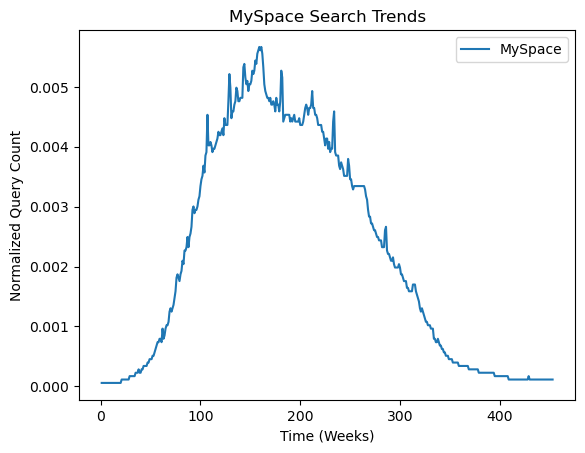

In [6]:

plt.title("MySpace Search Trends")
plt.plot(t, q, label="MySpace")
plt.xlabel("Time (Weeks)")
plt.ylabel("Normalized Query Count")
plt.legend()

In [7]:
def weibull(t, alpha, beta):
    ab, tb = alpha / beta, t / beta
    return ab * tb**(alpha - 1) * np.exp(-tb**alpha)

In [8]:
def KL(f, q):
    return np.sum(f * np.log(f / q))

In [9]:
def objective(x):
    alpha, beta = x
    return KL(weibull(t, alpha, beta), q)

### Task 2.5

In [10]:
# result = minimize(objective, x0=[1.0, 100.], bounds=[(-np.inf, np.inf), (-np.inf, np.inf)])
# result = minimize(objective, x0=[1.0, 100.], bounds=[(0, 10), (0, 500)])
# result = minimize(objective, x0=[1.0, 100.], method="BFGS")
# result = minimize(objective, x0=[1.0, 100.], method="L-BFGS-B")
result = minimize(objective, x0=[1.0, 100.], method="SLSQP")
alpha, beta = result.x
result

/tmp/ipykernel_2210/2920357340.py:2: RuntimeWarning: divide by zero encountered in log
  return np.sum(f * np.log(f / q))
/tmp/ipykernel_2210/2920357340.py:2: RuntimeWarning: invalid value encountered in multiply
  return np.sum(f * np.log(f / q))
/tmp/ipykernel_2210/1698597844.py:3: RuntimeWarning: invalid value encountered in power
  return ab * tb**(alpha - 1) * np.exp(-tb**alpha)


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.03362500434324213
       x: [ 2.868e+00  2.159e+02]
     nit: 29
     jac: [ 4.577e-04  7.093e-06]
    nfev: 102
    njev: 29

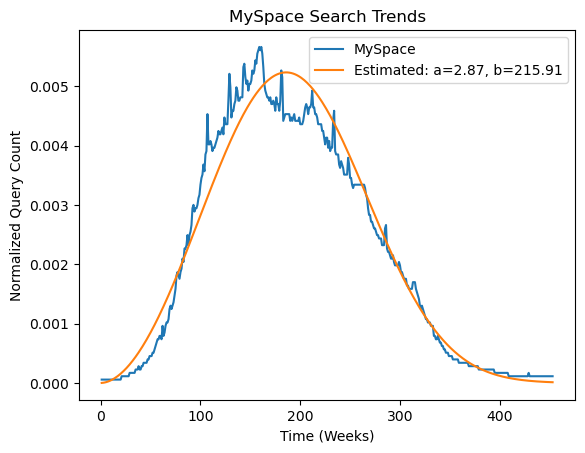

In [11]:
plt.title("MySpace Search Trends")
plt.plot(t, q, label="MySpace")
plt.xlabel("Time (Weeks)")
plt.ylabel("Normalized Query Count")
plt.plot(t, weibull(t, alpha, beta), label=f"Estimated: a={alpha:.2f}, b={beta:.2f}")
plt.legend()
plt.savefig("slides/images/sciminimize.png")